## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.shape

(730, 16)

In [4]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking null values

bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# from the given data we can see that instant is an index column and it doesnt serve any purpose

bikes.drop(['instant'],axis=1,inplace=True)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# from the given data we can see that cnt column is sum of casual+registered, so we are going to drop both columns

bikes.drop(['casual','registered'],axis=1,inplace=True)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# dteday contains the same information as 'yr' and 'mnth', so its better to drop the columns to reduce data redundancy

bikes.drop(['dteday'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# changing columns names in oder to understand data better

bikes.rename(columns = {'yr':'year', 'mnth':'month', 'hum':'humidity', 'atemp':'feeltemp'}, inplace = True)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeltemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### From data it's very clear that `'season'` , `'month'` , `'weekday'` , `'weathersit'` are `categorical variables` so we are going to assign appropriate values

In [11]:
# assigning appropriate values for 'season' columns

bikes['season'] = bikes['season'].map({1 : 'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
# assigning appropriate values for 'season' columns and as its clear that 1-5 are workingdays 
## '6'&'0' are not working days so they must be satusday and sunday

bikes['weekday'] = bikes['weekday'].map({ 0:'sun' ,1 : 'mon', 2:'tue', 3:'wed', 4:'thur', 5:'fri', 6:'sat'}) 

In [13]:
# assigning appropriate values for 'weathersit' columns

bikes['weathersit'] = bikes['weathersit'].map({1 : 'clear_few_cloud', 2:'mist_cloudy', 3:'light_rain_snow', 4:'heavy_rain_snow'}) 

In [14]:
# assigning appropriate values for 'month' columns

bikes['month'] = bikes['month'].map({ 1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'}) 
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeltemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear_few_cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear_few_cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear_few_cloud,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# checking data types

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   feeltemp    730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [16]:
# changing data types to appropriate data types
bikes[['temp','feeltemp','humidity','windspeed','cnt']]=bikes[['temp','feeltemp','humidity','windspeed','cnt']].apply(pd.to_numeric)

In [17]:
# changing data types to appropriate data types
bikes[['season','month','weekday','weathersit']]=bikes[['season','month','weekday','weathersit']].astype(object)

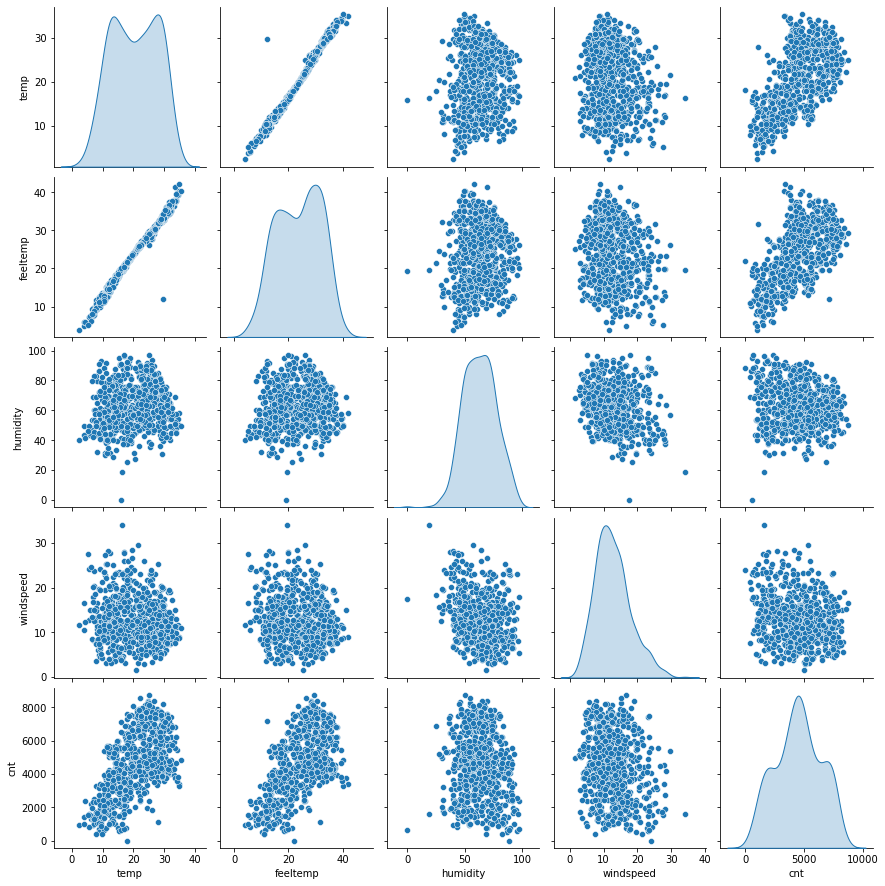

In [18]:
# Visualising the data for numeric variables

sns.pairplot(bikes[['temp','feeltemp','humidity','windspeed','cnt']] , diag_kind='kde')
plt.show()

#### Inference : From above pairplot, it is very clear that `correlation` between `temp` and `feeltemp` is `very high` and `positive`.

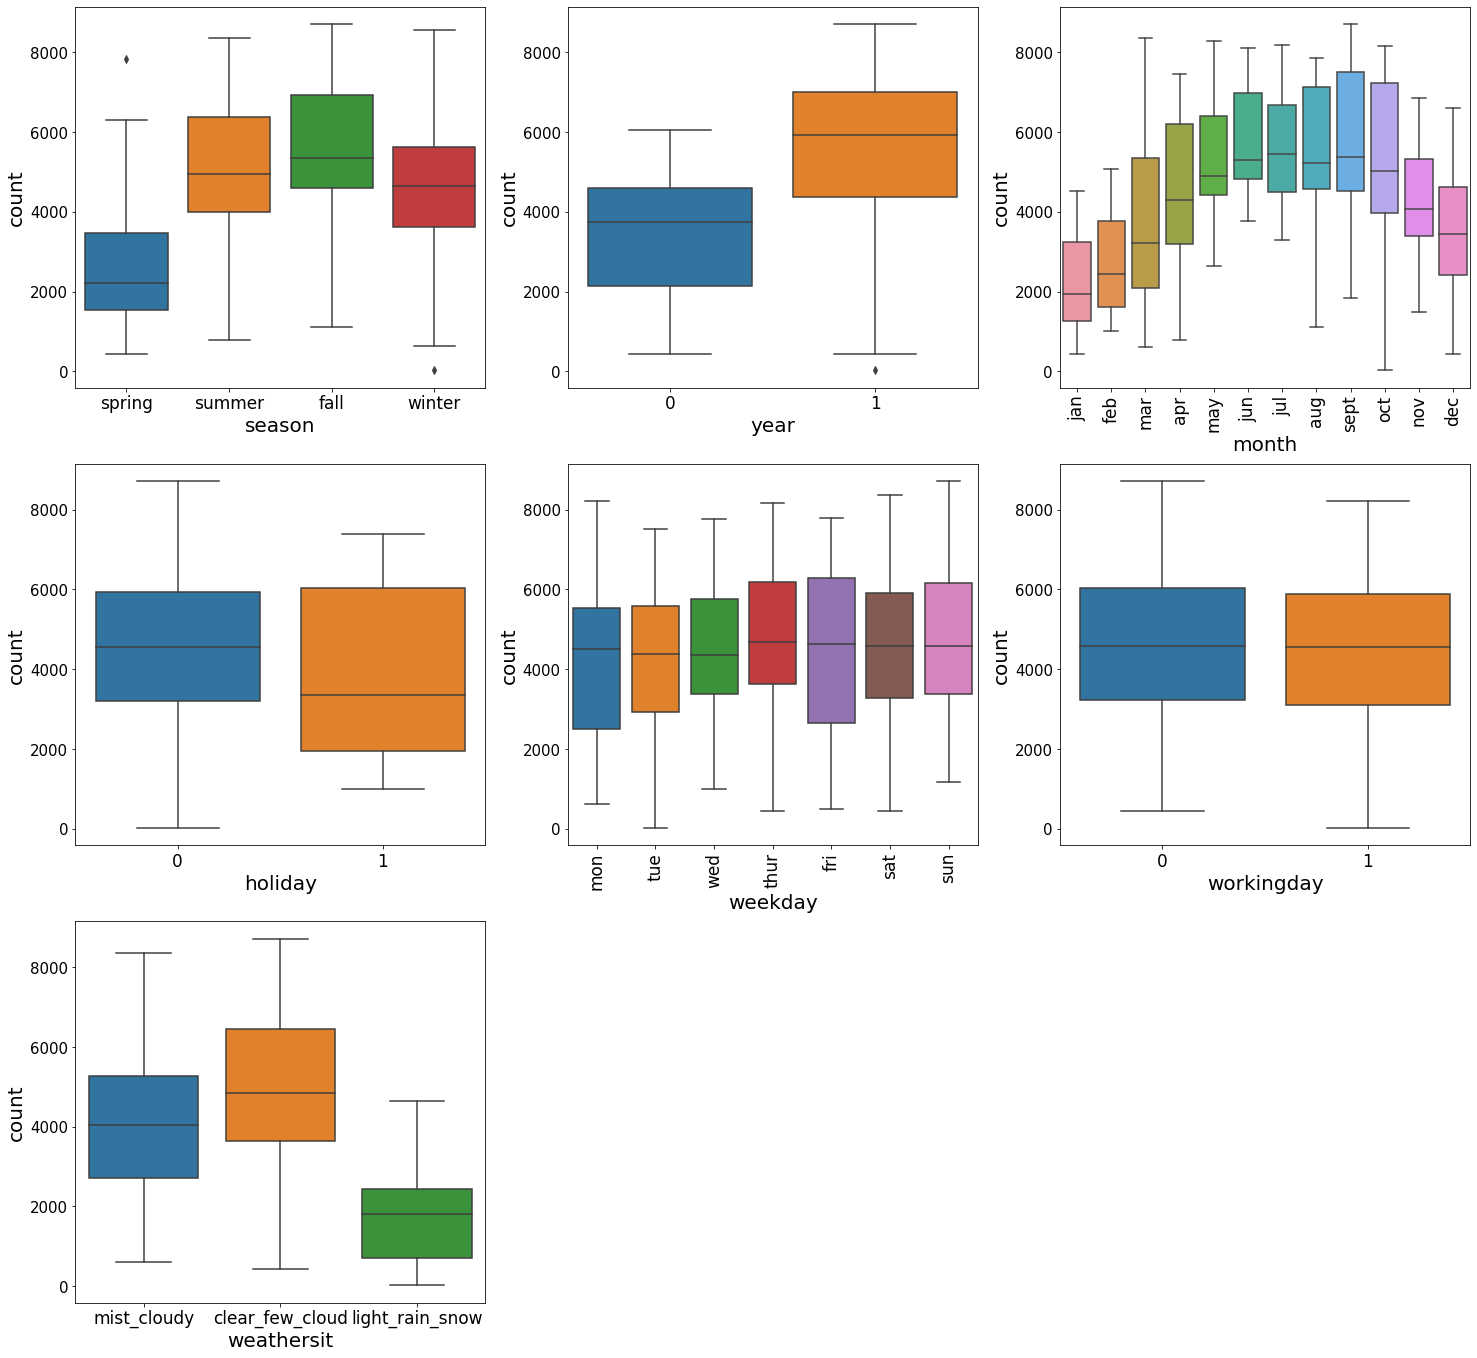

In [19]:
# Visualising the data for categorical variables

plt.figure(figsize=(25,12))
plt.subplots_adjust(left=None, bottom=3.5, right=None, top=5, wspace=None, hspace=None)

plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=bikes)
plt.xlabel('season',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)


plt.subplot(3, 3, 2)
sns.boxplot(x='year', y='cnt', data=bikes)
plt.xlabel('year',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)

plt.subplot(3, 3, 3)
sns.boxplot(x='month', y='cnt', data=bikes)
plt.xlabel('month',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(fontsize=17, rotation = 90)
plt.yticks(fontsize=15)

plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bikes)
plt.xlabel('holiday',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)

plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bikes)
plt.xlabel('weekday',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(fontsize=17, rotation = 90)
plt.yticks(fontsize=15)

plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bikes)
plt.xlabel('workingday',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)

plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=bikes)
plt.xlabel('weathersit',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)


plt.show()

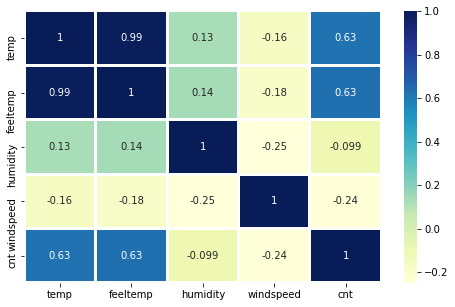

In [20]:
# correlation between numerical variables

numvars = bikes[['temp','feeltemp','humidity','windspeed','cnt']]

plt.figure(figsize=(8,5))
sns.heatmap(numvars.corr(), annot=True, cmap='YlGnBu', linewidth =2)

plt.show()

#### Inference : `Correlation` between `temp` and `feeltemp` is `0.99` 

In [21]:
# As the correlation between both are very high so it's better to keep one of them
# We'll keep temp

bikes.drop(['feeltemp'],axis=1,inplace=True)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear_few_cloud,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear_few_cloud,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear_few_cloud,9.305237,43.6957,12.522300,1600


## Step 2: Prepair the data for modelling

- Encoding: 
  - Converting categorical vars to dummy vars
  
- Splitting into train-test

- Rescalling of vars

### Dummy Variables

In [22]:
# creating dummy vars for season
# dropping a redundant dummy vars

statusseason = pd.get_dummies(bikes['season'], drop_first=True)

statusseason.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
# creating dummy vars for month
# dropping a redundant dummy vars

statusmonth = pd.get_dummies(bikes['month'], drop_first=True)

statusmonth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [24]:
# creating dummy vars for weekday
# dropping a redundant dummy vars

statusweekday = pd.get_dummies(bikes['weekday'], drop_first=True)

statusweekday.head()

,mon,sat,sun,thur,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [25]:
# creating dummy vars for weathersit
# dropping a redundant dummy vars

statusweathersit = pd.get_dummies(bikes['weathersit'], drop_first=True)

statusweathersit.head()

,light_rain_snow,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [26]:
# concating dummy vars to original dataset

bikes=pd.concat([bikes,statusseason],axis=1)
bikes=pd.concat([bikes,statusweathersit],axis=1)
bikes=pd.concat([bikes,statusweekday],axis=1)
bikes=pd.concat([bikes,statusmonth],axis=1)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,wed,1,clear_few_cloud,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,thur,1,clear_few_cloud,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,fri,1,clear_few_cloud,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [27]:
#Deleting the orginal columns season, month, weekday, weathersit 

bikes.drop(['season'],axis=1,inplace=True)
bikes.drop(['month'],axis=1,inplace=True)
bikes.drop(['weekday'],axis=1,inplace=True)
bikes.drop(['weathersit'],axis=1,inplace=True)

bikes.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting into train and test

In [28]:
import sklearn
from sklearn.model_selection import train_test_split

In [29]:
bikes_train, bikes_test = train_test_split(bikes, train_size=0.7, random_state=100)

print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features 

We will use MinMax scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler

#### Normalisation : (x - xmin) / (xmax - xmin)

In [31]:
# 1. Instantiate an object

scaler = MinMaxScaler()

# Crete a list of numeric vars

num_vars = ['cnt', 'humidity', 'windspeed', 'temp']

# 2. Fit on data

bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])

bikes_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
bikes_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Training the model

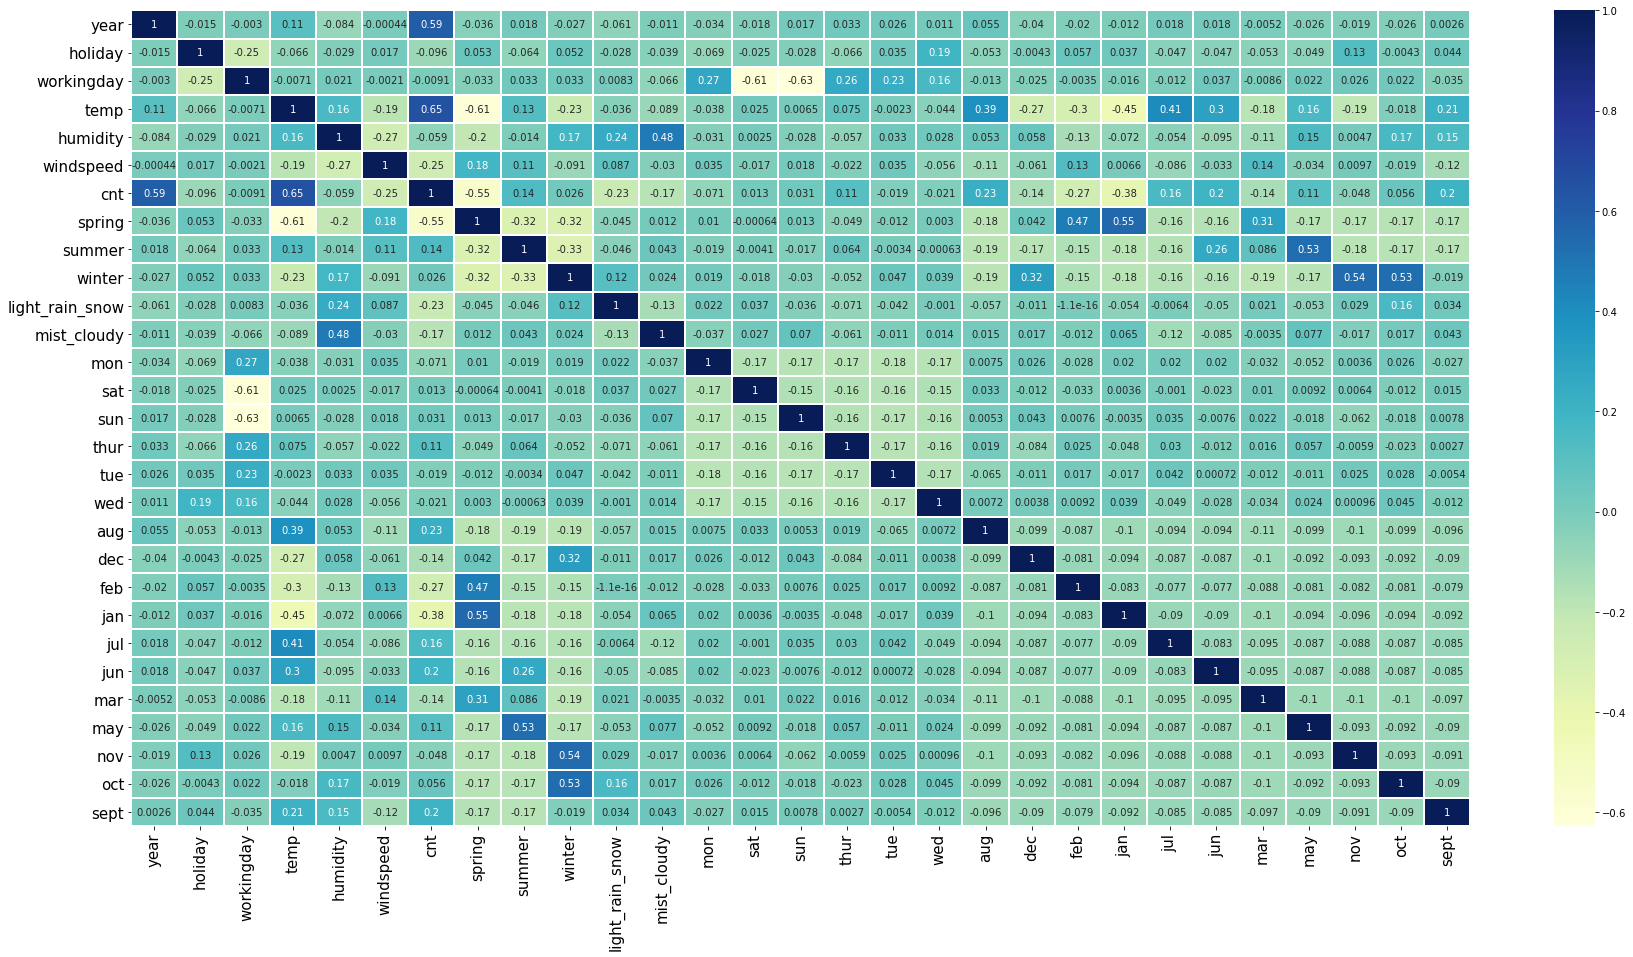

In [33]:
# Heatmap

plt.figure(figsize=(30,15))
sns.heatmap(bikes_train.corr(), annot=True, cmap='YlGnBu', linewidth =1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Inference : As there are too much variables to look at, in order to understand better , we will use RFE (Recursive Feature Elimination) method to reduce number of variables. 

### Dividing X and Y sets for model building

In [34]:
# X_train, y_train

y_train = bikes_train.pop('cnt')
X_train = bikes_train

### RFE (Recursive Feature Elimination)

In [35]:
# Importing RFE and LinearRegression 

from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with output number of variables equal to 12

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm , 15)             ## Running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_ ))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light_rain_snow', True, 1),
 ('mist_cloudy', True, 1),
 ('mon', False, 7),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thur', False, 13),
 ('tue', False, 6),
 ('wed', False, 10),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 14),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sept', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'light_rain_snow', 'mist_cloudy', 'dec', 'jan', 'jul', 'nov',
       'sept'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mon', 'sat', 'sun', 'thur', 'tue', 'wed', 'aug', 'feb',
       'jun', 'mar', 'may', 'oct'],
      dtype='object')

In [40]:
# creating dtatframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe

,year,holiday,temp,humidity,windspeed,spring,summer,winter,light_rain_snow,mist_cloudy,dec,jan,jul,nov,sept
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,0,1,1,0,0,0,0
79,0,0,0.462664,0.759870,0.529881,0,1,0,0,1,0,0,0,0,0


In [41]:
# Importing statsmodel and adding constant variable

import statsmodels.api as sm

X_train_sm1 = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_sm1).fit()    ## Runing Linear Model

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          8.15e-189
Time:                        02:58:38   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [42]:
# imporing variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| humidity        | 30.89 |
| temp            | 17.79 |
| windspeed       |  4.72 |
| spring          |  4.37 |
| winter          |  4.06 |
| summer          |  2.82 |
| mist_cloudy     |  2.32 |
| year            |  2.09 |
| nov             |  1.85 |
| jan             |  1.75 |
| jul             |  1.59 |
| dec             |  1.56 |
| sept            |  1.41 |
| light_rain_snow |  1.28 |
| holiday         |  1.06 |
+-----------------+-------+


#### Inference : Humidity is having a very high VIF. So we are going to drop it and evaluate model again.

In [44]:
# Dropping Humidity because of very high VIF

X_train_rfe2 = X_train_rfe.drop('humidity', axis=1)

In [45]:
# Adding constant and building 2nd model

X_train_sm2 = sm.add_constant(X_train_rfe2)


lm2 = sm.OLS(y_train, X_train_sm2).fit()    ## Runing Linear Model


print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          4.75e-186
Time:                        02:58:38   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032     

In [46]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| temp            |  5.17 |
| windspeed       |  4.67 |
| winter          |  2.95 |
| spring          |  2.89 |
| summer          |  2.24 |
| year            |  2.07 |
| nov             |  1.81 |
| jan             |  1.66 |
| jul             |  1.59 |
| mist_cloudy     |  1.57 |
| dec             |  1.47 |
| sept            |  1.35 |
| light_rain_snow |  1.09 |
| holiday         |  1.06 |
+-----------------+-------+


#### Inference : temp is having a very high VIF. So we are going to drop it and evaluate model again.

In [47]:
# Dropping temp because of very high VIF

X_train_rfe3 = X_train_rfe2.drop('temp', axis=1)

In [48]:
# Adding constant and building 3rd model

X_train_sm3 = sm.add_constant(X_train_rfe3)


lm3 = sm.OLS(y_train, X_train_sm3).fit()    ## Runing Linear Model


print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.82e-159
Time:                        02:58:39   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5954      0.016     

In [49]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  3.89 |
| spring          |  2.89 |
| winter          |  2.85 |
| summer          |  2.02 |
| year            |  1.83 |
| nov             |  1.8  |
| jan             |  1.64 |
| mist_cloudy     |  1.53 |
| dec             |  1.46 |
| jul             |  1.2  |
| sept            |  1.18 |
| light_rain_snow |  1.09 |
| holiday         |  1.06 |
+-----------------+-------+


In [50]:
# Dropping jul because of very high p-value

X_train_rfe4 = X_train_rfe3.drop('jul', axis=1)

In [51]:
# Adding constant and building 4th model

X_train_sm4= sm.add_constant(X_train_rfe4)


lm4 = sm.OLS(y_train, X_train_sm4).fit()    ## Runing Linear Model


print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.08e-160
Time:                        02:58:39   Log-Likelihood:                 438.45
No. Observations:                 510   AIC:                            -850.9
Df Residuals:                     497   BIC:                            -795.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5886      0.014     

In [52]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  3.52 |
| winter          |  2.75 |
| spring          |  2.71 |
| summer          |  1.87 |
| nov             |  1.8  |
| year            |  1.77 |
| jan             |  1.64 |
| mist_cloudy     |  1.52 |
| dec             |  1.46 |
| sept            |  1.16 |
| light_rain_snow |  1.09 |
| holiday         |  1.06 |
+-----------------+-------+


In [53]:
# Dropping winter because of very high p-value

X_train_rfe5 = X_train_rfe4.drop('winter', axis=1)

In [54]:
# Adding constant and building 5th model

X_train_sm5 = sm.add_constant(X_train_rfe5)


lm5 = sm.OLS(y_train, X_train_sm5).fit()    ## Runing Linear Model


print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.71e-161
Time:                        02:58:39   Log-Likelihood:                 437.88
No. Observations:                 510   AIC:                            -851.8
Df Residuals:                     498   BIC:                            -800.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5834      0.013     

In [55]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  3.23 |
| spring          |  2.37 |
| year            |  1.74 |
| summer          |  1.7  |
| jan             |  1.62 |
| mist_cloudy     |  1.48 |
| nov             |  1.23 |
| sept            |  1.16 |
| dec             |  1.13 |
| light_rain_snow |  1.07 |
| holiday         |  1.06 |
+-----------------+-------+


### Inference : All features that are included in model are pretty significant and has low VIF also.

## Adding rest of features and see if accuracy of model improves

In [56]:
# Dropping summer because of very high VIF
X_train_rfe6 = X_train_rfe5.drop('windspeed', axis=1)

In [57]:
# Adding constant and building 6th model

X_train_sm6 = sm.add_constant(X_train_rfe6)


lm6 = sm.OLS(y_train, X_train_sm6).fit()    ## Runing Linear Model


print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.79e-153
Time:                        02:58:39   Log-Likelihood:                 415.91
No. Observations:                 510   AIC:                            -809.8
Df Residuals:                     499   BIC:                            -763.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5309      0.011     

In [58]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| spring          |  1.84 |
| jan             |  1.61 |
| year            |  1.55 |
| mist_cloudy     |  1.44 |
| summer          |  1.31 |
| nov             |  1.12 |
| sept            |  1.12 |
| dec             |  1.1  |
| holiday         |  1.06 |
| light_rain_snow |  1.03 |
+-----------------+-------+


In [59]:
# Adding workingday
X_train_rfe7 = X_train_rfe6
X_train_rfe7['workingday']=X_train['workingday']

In [60]:
# Adding constant and building 7th model

X_train_sm7 = sm.add_constant(X_train_rfe7)


lm7 = sm.OLS(y_train, X_train_sm7).fit()    ## Runing Linear Model


print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     155.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          4.56e-153
Time:                        02:58:39   Log-Likelihood:                 418.38
No. Observations:                 510   AIC:                            -812.8
Df Residuals:                     498   BIC:                            -761.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5491      0.014     

In [61]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| workingday      |  2.36 |
| spring          |  2    |
| year            |  1.72 |
| jan             |  1.61 |
| summer          |  1.52 |
| mist_cloudy     |  1.46 |
| nov             |  1.22 |
| sept            |  1.18 |
| dec             |  1.14 |
| holiday         |  1.1  |
| light_rain_snow |  1.04 |
+-----------------+-------+


In [62]:
X_train_rfe8 = X_train_rfe7.drop('workingday', axis=1)

In [63]:
# Adding constant and building 8th model

X_train_sm8 = sm.add_constant(X_train_rfe8)


lm8 = sm.OLS(y_train, X_train_sm8).fit()    ## Runing Linear Model


print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.79e-153
Time:                        02:58:39   Log-Likelihood:                 415.91
No. Observations:                 510   AIC:                            -809.8
Df Residuals:                     499   BIC:                            -763.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5309      0.011     

In [64]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| spring          |  1.84 |
| jan             |  1.61 |
| year            |  1.55 |
| mist_cloudy     |  1.44 |
| summer          |  1.31 |
| nov             |  1.12 |
| sept            |  1.12 |
| dec             |  1.1  |
| holiday         |  1.06 |
| light_rain_snow |  1.03 |
+-----------------+-------+


In [65]:
# Adding Oct
X_train_rfe9 = X_train_rfe5
X_train_rfe9['oct']=X_train['oct']

In [66]:
# Adding constant and building 9th model

X_train_sm9 = sm.add_constant(X_train_rfe9)


lm9 = sm.OLS(y_train, X_train_sm9).fit()    ## Runing Linear Model


print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     157.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.27e-160
Time:                        02:58:39   Log-Likelihood:                 438.36
No. Observations:                 510   AIC:                            -850.7
Df Residuals:                     497   BIC:                            -795.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5880      0.014     

In [67]:
# Adding May
X_train_rfe10 = X_train_rfe9
X_train_rfe10['may']=X_train['may']

In [68]:
# Adding constant and building 10th model

X_train_sm10 = sm.add_constant(X_train_rfe10)


lm10 = sm.OLS(y_train, X_train_sm10).fit()    ## Runing Linear Model


print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          6.55e-161
Time:                        02:58:39   Log-Likelihood:                 442.28
No. Observations:                 510   AIC:                            -856.6
Df Residuals:                     496   BIC:                            -797.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5854      0.014     

In [69]:
# Dropping Oct because of very high p-value

X_train_rfe11 = X_train_rfe10.drop('oct', axis=1)

In [70]:
# Adding constant and building 11th model

X_train_sm11 = sm.add_constant(X_train_rfe11)


lm11 = sm.OLS(y_train, X_train_sm11).fit()    ## Runing Linear Model


print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.6
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          8.27e-162
Time:                        02:58:39   Log-Likelihood:                 441.78
No. Observations:                 510   AIC:                            -857.6
Df Residuals:                     497   BIC:                            -802.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5808      0.013     

In [71]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe11.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe11.values, i) for i in range(X_train_rfe11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  3.25 |
| spring          |  2.37 |
| summer          |  2.3  |
| year            |  1.74 |
| jan             |  1.62 |
| may             |  1.54 |
| mist_cloudy     |  1.49 |
| nov             |  1.23 |
| sept            |  1.16 |
| dec             |  1.13 |
| light_rain_snow |  1.07 |
| holiday         |  1.06 |
+-----------------+-------+


In [72]:
# Adding sat

X_train_rfe12 = X_train_rfe11
X_train_rfe12['sat']=X_train['sat']

In [73]:
# Adding constant and building 12th model

X_train_sm12 = sm.add_constant(X_train_rfe12)


lm12 = sm.OLS(y_train, X_train_sm12).fit()    ## Runing Linear Model


print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     147.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.67e-161
Time:                        02:58:39   Log-Likelihood:                 442.88
No. Observations:                 510   AIC:                            -857.8
Df Residuals:                     496   BIC:                            -798.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5781      0.013     

In [74]:
# Removing sat for very high p-value and adding sun

X_train_rfe13 = X_train_rfe12.drop('sat', axis=1)
X_train_rfe13['sun']=X_train['sun']

In [75]:
# Adding constant and building 13th model

X_train_sm13 = sm.add_constant(X_train_rfe13)


lm13 = sm.OLS(y_train, X_train_sm13).fit()    ## Runing Linear Model


print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     147.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.65e-161
Time:                        02:58:39   Log-Likelihood:                 442.89
No. Observations:                 510   AIC:                            -857.8
Df Residuals:                     496   BIC:                            -798.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5785      0.013     

In [76]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe13.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe13.values, i) for i in range(X_train_rfe13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  3.3  |
| spring          |  2.37 |
| summer          |  2.3  |
| year            |  1.75 |
| jan             |  1.62 |
| may             |  1.54 |
| mist_cloudy     |  1.5  |
| nov             |  1.23 |
| sept            |  1.16 |
| sun             |  1.16 |
| dec             |  1.13 |
| light_rain_snow |  1.07 |
| holiday         |  1.06 |
+-----------------+-------+


In [77]:
# Removing sun for very high p-value and adding tue

X_train_rfe14 = X_train_rfe13.drop('sun', axis=1)
X_train_rfe14['tue']=X_train['tue']

In [78]:
# Adding constant and building 14th model

X_train_sm14 = sm.add_constant(X_train_rfe14)


lm14 = sm.OLS(y_train, X_train_sm14).fit()    ## Runing Linear Model


print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     148.8
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.08e-161
Time:                        02:58:39   Log-Likelihood:                 444.15
No. Observations:                 510   AIC:                            -860.3
Df Residuals:                     496   BIC:                            -801.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5843      0.013     

In [79]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe14.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe14.values, i) for i in range(X_train_rfe14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  3.32 |
| spring          |  2.37 |
| summer          |  2.31 |
| year            |  1.75 |
| jan             |  1.62 |
| may             |  1.54 |
| mist_cloudy     |  1.49 |
| nov             |  1.24 |
| tue             |  1.17 |
| sept            |  1.16 |
| dec             |  1.13 |
| light_rain_snow |  1.07 |
| holiday         |  1.06 |
+-----------------+-------+


In [80]:
# Removing tue for high p-value and adding mar

X_train_rfe15 = X_train_rfe14.drop('tue', axis=1)
X_train_rfe15['mar']=X_train['mar']

In [81]:
# Adding constant and building 15th model

X_train_sm15 = sm.add_constant(X_train_rfe15)


lm15 = sm.OLS(y_train, X_train_sm15).fit()    ## Runing Linear Model


print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.04e-160
Time:                        02:58:39   Log-Likelihood:                 441.80
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     496   BIC:                            -796.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5807      0.013     

In [82]:
# Removing mar for very high p-value and adding mon

X_train_rfe16 = X_train_rfe15.drop('mar', axis=1)
X_train_rfe16['mon']=X_train['mon']

In [83]:
# Adding constant and building 16th model

X_train_sm16 = sm.add_constant(X_train_rfe16)


lm16 = sm.OLS(y_train, X_train_sm16).fit()    ## Runing Linear Model


print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     148.4
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.79e-161
Time:                        02:58:40   Log-Likelihood:                 443.62
No. Observations:                 510   AIC:                            -859.2
Df Residuals:                     496   BIC:                            -800.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5846      0.013     

In [84]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe16.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe16.values, i) for i in range(X_train_rfe16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  3.33 |
| spring          |  2.37 |
| summer          |  2.31 |
| year            |  1.75 |
| jan             |  1.63 |
| may             |  1.54 |
| mist_cloudy     |  1.49 |
| nov             |  1.24 |
| mon             |  1.17 |
| sept            |  1.16 |
| dec             |  1.13 |
| light_rain_snow |  1.07 |
| holiday         |  1.06 |
+-----------------+-------+


In [85]:
# Removing mon for very high p-value and adding temp

X_train_rfe17 = X_train_rfe16.drop('mon', axis=1)
X_train_rfe17['temp']=X_train['temp']

In [86]:
# Adding constant and building 17th model

X_train_sm17 = sm.add_constant(X_train_rfe17)


lm17 = sm.OLS(y_train, X_train_sm17).fit()    ## Runing Linear Model


print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.23e-179
Time:                        02:58:40   Log-Likelihood:                 486.23
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     496   BIC:                            -885.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3565      0.026     

In [87]:
X_train_rfe18 = X_train_rfe17.drop('may', axis=1)

In [88]:
# Adding constant and building 17th model

X_train_sm18 = sm.add_constant(X_train_rfe18)


lm18 = sm.OLS(y_train, X_train_sm18).fit()    ## Runing Linear Model


print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.71e-180
Time:                        02:58:40   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     497   BIC:                            -889.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3525      0.026     

In [89]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe18.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe18.values, i) for i in range(X_train_rfe18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  4.44 |
| temp            |  3.86 |
| spring          |  2.44 |
| year            |  2.05 |
| summer          |  1.74 |
| jan             |  1.63 |
| mist_cloudy     |  1.52 |
| sept            |  1.25 |
| nov             |  1.24 |
| dec             |  1.13 |
| light_rain_snow |  1.07 |
| holiday         |  1.06 |
+-----------------+-------+


In [90]:
# Removing nov for very high p-value

X_train_rfe19 = X_train_rfe18.drop('nov' , axis=1)

In [91]:
# Adding constant and building 18th model

X_train_sm19 = sm.add_constant(X_train_rfe19)


lm19 = sm.OLS(y_train, X_train_sm19).fit()    ## Runing Linear Model


print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.89e-181
Time:                        02:58:40   Log-Likelihood:                 485.17
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     498   BIC:                            -895.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3444      0.021     

In [92]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe19.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe19.values, i) for i in range(X_train_rfe19.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  4.1  |
| temp            |  3.85 |
| spring          |  2.31 |
| year            |  2.04 |
| jan             |  1.63 |
| summer          |  1.62 |
| mist_cloudy     |  1.51 |
| sept            |  1.22 |
| dec             |  1.11 |
| light_rain_snow |  1.06 |
| holiday         |  1.03 |
+-----------------+-------+


In [93]:
# Removing summer for very high p-value

X_train_rfe20 = X_train_rfe19.drop('summer' , axis=1)

In [94]:
# Adding constant and building 19th model

X_train_sm20 = sm.add_constant(X_train_rfe20)


lm20 = sm.OLS(y_train, X_train_sm20).fit()    ## Runing Linear Model


print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.01e-182
Time:                        02:58:40   Log-Likelihood:                 485.08
No. Observations:                 510   AIC:                            -948.2
Df Residuals:                     499   BIC:                            -901.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3467      0.021     

In [95]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe20.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe20.values, i) for i in range(X_train_rfe20.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| windspeed       |  3.76 |
| temp            |  3.76 |
| spring          |  2.14 |
| year            |  2.03 |
| jan             |  1.63 |
| mist_cloudy     |  1.49 |
| sept            |  1.16 |
| dec             |  1.09 |
| light_rain_snow |  1.06 |
| holiday         |  1.03 |
+-----------------+-------+


In [96]:
# Removing dec for very high p-value

X_train_rfe21 = X_train_rfe20.drop('dec' , axis=1)

In [97]:
# Adding constant and building 20th model

X_train_sm21 = sm.add_constant(X_train_rfe21)


lm21 = sm.OLS(y_train, X_train_sm21).fit()    ## Runing Linear Model


print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.5
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          4.04e-183
Time:                        02:58:40   Log-Likelihood:                 483.83
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     500   BIC:                            -905.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3339      0.019     

In [98]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe21.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe21.values, i) for i in range(X_train_rfe21.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| temp            |  3.76 |
| windspeed       |  3.74 |
| spring          |  2.11 |
| year            |  2.03 |
| jan             |  1.6  |
| mist_cloudy     |  1.48 |
| sept            |  1.16 |
| light_rain_snow |  1.06 |
| holiday         |  1.03 |
+-----------------+-------+


In [99]:
# Removing jan

X_train_rfe22 = X_train_rfe21.drop('jan' , axis=1)

In [100]:
# Adding constant and building 21th model

X_train_sm22 = sm.add_constant(X_train_rfe22)


lm22 = sm.OLS(y_train, X_train_sm22).fit()    ## Runing Linear Model


print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     289.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.01e-182
Time:                        02:58:40   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -939.7
Df Residuals:                     501   BIC:                            -901.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3230      0.019     

In [101]:
# Calculating VIF for features

vif = pd.DataFrame()
vif['Features'] = X_train_rfe22.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe22.values, i) for i in range(X_train_rfe22.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+-----------------+-------+
| Features        |   VIF |
|-----------------+-------|
| temp            |  3.75 |
| windspeed       |  3.73 |
| year            |  2.02 |
| spring          |  1.52 |
| mist_cloudy     |  1.46 |
| sept            |  1.16 |
| light_rain_snow |  1.06 |
| holiday         |  1.03 |
+-----------------+-------+


## We've checked alomost all the features and we will stop model building now.

### The model with better results and accuracy is `lm22`.

In [102]:
# Calculating y_train_pred

y_train_pred = lm22.predict(X_train_sm22)

## Step 4. Residual analysis

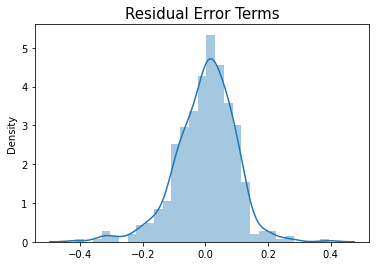

In [103]:
## plotting residual error terms

res = y_train - y_train_pred
sns.distplot(res)
plt.title("Residual Error Terms", fontsize = 15)
plt.show()

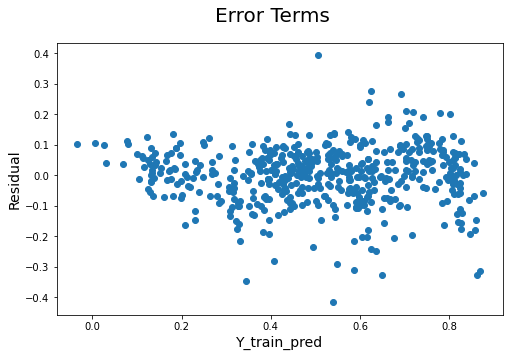

In [104]:
# Error terms train set
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train_pred,res)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.show()

## Step 5. Predictions and evaluations on test set

In [105]:
# Crete a list of numeric vars

num_vars = ['cnt', 'humidity', 'windspeed', 'temp']

# 2. Fit on data

bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

bikes_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [106]:
# creating X_test, y_test

y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [107]:
# add a contstant as statsmodels.api doesn't have it

X_test_sm = sm.add_constant(X_test)

X_test_sm.head()

,const,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,0,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [108]:
X_test_sm = X_test_sm[X_train_sm22.columns]

In [109]:
# Predicting based on model we choose

y_test_pred = lm22.predict(X_test_sm)

In [110]:
from sklearn.metrics import r2_score

### R2 Score

In [111]:
print("R2 score :" , round(r2_score(y_true=y_test, y_pred=y_test_pred),2))

R2 score : 0.8


In [112]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
r2_test_adj = round((1-((1-r2_score(y_true=y_test, y_pred=y_test_pred))*(N-1)/(N-8-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.792


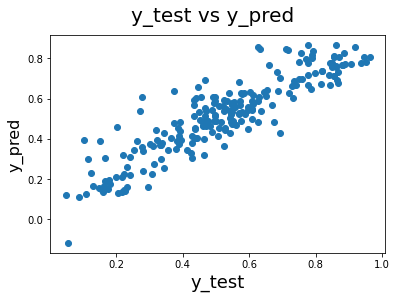

In [113]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

plt.show()

In [114]:
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     289.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.01e-182
Time:                        02:58:41   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -939.7
Df Residuals:                     501   BIC:                            -901.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3230      0.019     

### Our model is good enough to predict demand of bikes. The spread of test vs pedict indicates that the model is good enough to explain the change in demand.

### The Equation for best fitted line is : 



$ cnt = 0.3230 + 0.2365 \times  year - 0.0904  \times  holiday - 0.2797 \times lightrainsnow - 0.0779 \times mistcloudy + 0.3461 \times temp - 0.1466 \times windspeed - 0.1509 \times spring + 0.0687 \times sept $


### Demad is higher if it is :  `September`, `Temp`

### Demand takes a dip if it is : `Holiday` , `light_rain_snow` , `mist_cloudy` , `spring` 

### Demand is lower if there is high `windspeed` 